In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

In [2]:
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [3]:
Patient_count = data['Patient'].value_counts(sort=False)

In [4]:
Patient_count

258        522
8889      3682
9578      4184
10158     1240
5804      1272
6175      4064
10418    13120
10591      996
11333     6480
5371      3365
4456      4069
6563      1965
10020     1452
6514      1786
11580     7259
Name: Patient, dtype: int64

In [5]:
Patient_ID = Patient_count.index.values
Patient_num = len(Patient_ID)
Patient_ID_inv = dict(zip(Patient_ID, range(Patient_num)))

In [6]:
itp_idx = []
itp_idx.append(0)
for i in range(1, len(data)):
    if data['Patient'][i] != data['Patient'][i-1]:
        itp_idx.append(i)
itp_idx.append(len(data))

In [7]:
data_list = []
for i in range(Patient_num):
    data_list.append([])    

for i in range(1, len(itp_idx)):
    data_temp = data.iloc[itp_idx[i-1]:itp_idx[i]]
    Patient_temp = data_temp['Patient'].iloc[0]
    data_list[Patient_ID_inv[Patient_temp]].append(data_temp)
    
for i in range(Patient_num):
    print(len(data_list[i]))

1
1
1
1
1
2
2
1
1
1
2
1
1
1
1


In [8]:
for i in range(Patient_num):
    print("Patient: {}".format(Patient_ID[i]))
    print("Number of series: {}".format(len(data_list[i])))
    for j in range(len(data_list[i])):
        print("Length of series {}: {}".format(j, len(data_list[i][j])))
    print('--'*20)

Patient: 258
Number of series: 1
Length of series 0: 522
----------------------------------------
Patient: 8889
Number of series: 1
Length of series 0: 3682
----------------------------------------
Patient: 9578
Number of series: 1
Length of series 0: 4184
----------------------------------------
Patient: 10158
Number of series: 1
Length of series 0: 1240
----------------------------------------
Patient: 5804
Number of series: 1
Length of series 0: 1272
----------------------------------------
Patient: 6175
Number of series: 2
Length of series 0: 1169
Length of series 1: 2895
----------------------------------------
Patient: 10418
Number of series: 2
Length of series 0: 7541
Length of series 1: 5579
----------------------------------------
Patient: 10591
Number of series: 1
Length of series 0: 996
----------------------------------------
Patient: 11333
Number of series: 1
Length of series 0: 6480
----------------------------------------
Patient: 5371
Number of series: 1
Length of serie

In [9]:
features = data.columns.values[1:]

In [10]:
data_list[10][0]

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
38925,4456,-1,71,40,46,53,34,40,44,44,...,0.002989,0.007739,0.088131,0.002246,0.003345,0.007320,0.004412,0.001953,0.005366,0.004750
38926,4456,-1,76,37,44,50,35,41,48,48,...,0.003575,0.006314,0.035367,0.001476,0.003450,0.005423,0.001639,0.002040,0.002684,0.003434
38927,4456,-1,81,38,44,49,43,49,58,53,...,0.006094,0.020114,0.013997,0.002209,0.003170,0.004816,0.002479,0.003331,0.003270,0.002881
38928,4456,-1,84,40,47,51,42,51,66,53,...,0.007719,0.054916,0.046980,0.002266,0.003837,0.009254,0.004035,0.003510,0.008611,0.004383
38929,4456,-1,86,36,41,45,38,58,72,54,...,0.003920,0.029900,0.203914,0.001802,0.003264,0.007033,0.001405,0.003984,0.007009,0.004156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40998,4456,-1,120,32,33,42,92,28,35,38,...,0.003534,0.000808,2.170720,0.000485,0.000855,0.001003,0.035663,0.000504,0.001305,0.000646
40999,4456,-1,120,33,30,47,77,27,39,38,...,0.005648,0.001840,3.073212,0.000966,0.001870,0.001111,0.031119,0.001059,0.001813,0.000868
41000,4456,-1,120,37,35,48,82,35,40,42,...,0.009518,0.002608,5.655946,0.002012,0.003222,0.003926,0.043128,0.001660,0.003011,0.004977
41001,4456,-1,120,42,39,45,77,48,45,47,...,0.009505,0.002368,2.205631,0.004633,0.004208,0.002911,0.043560,0.003929,0.006526,0.003329


In [11]:
data_list[10][1]

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
44420,4456,0,38,51,63,62,35,38,59,56,...,0.003337,0.002995,0.003106,0.001890,0.001300,0.003199,0.003403,0.002013,0.006156,0.004367
44421,4456,1,34,58,74,63,39,43,54,63,...,0.004741,0.003692,0.003499,0.004048,0.001804,0.005295,0.003747,0.004106,0.008320,0.006032
44422,4456,1,29,54,70,61,39,46,50,66,...,0.004156,0.004198,0.004660,0.002495,0.001053,0.004842,0.004710,0.002474,0.005562,0.004137
44423,4456,1,32,55,62,66,35,43,62,61,...,0.003867,0.003799,0.004728,0.003063,0.002258,0.005990,0.004530,0.004899,0.008531,0.004484
44424,4456,1,33,58,67,74,33,40,65,57,...,0.005920,0.003042,0.004484,0.001841,0.001866,0.004219,0.004393,0.002238,0.006633,0.005436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,4456,1,119,47,62,65,54,62,76,65,...,0.006971,0.018417,0.455181,0.015277,0.006867,0.005102,0.012481,0.016809,0.006139,0.004799
46407,4456,1,94,51,61,68,58,69,68,63,...,0.006375,0.028511,0.540295,0.008345,0.006357,0.005356,0.009248,0.016303,0.007366,0.006487
46408,4456,1,52,58,69,72,56,72,67,69,...,0.006753,0.039773,0.047900,0.008114,0.006653,0.006704,0.022538,0.025874,0.005844,0.005155
46409,4456,1,36,58,74,76,55,70,72,74,...,0.005938,0.028334,0.023183,0.006327,0.004353,0.007528,0.026517,0.014762,0.006563,0.005722


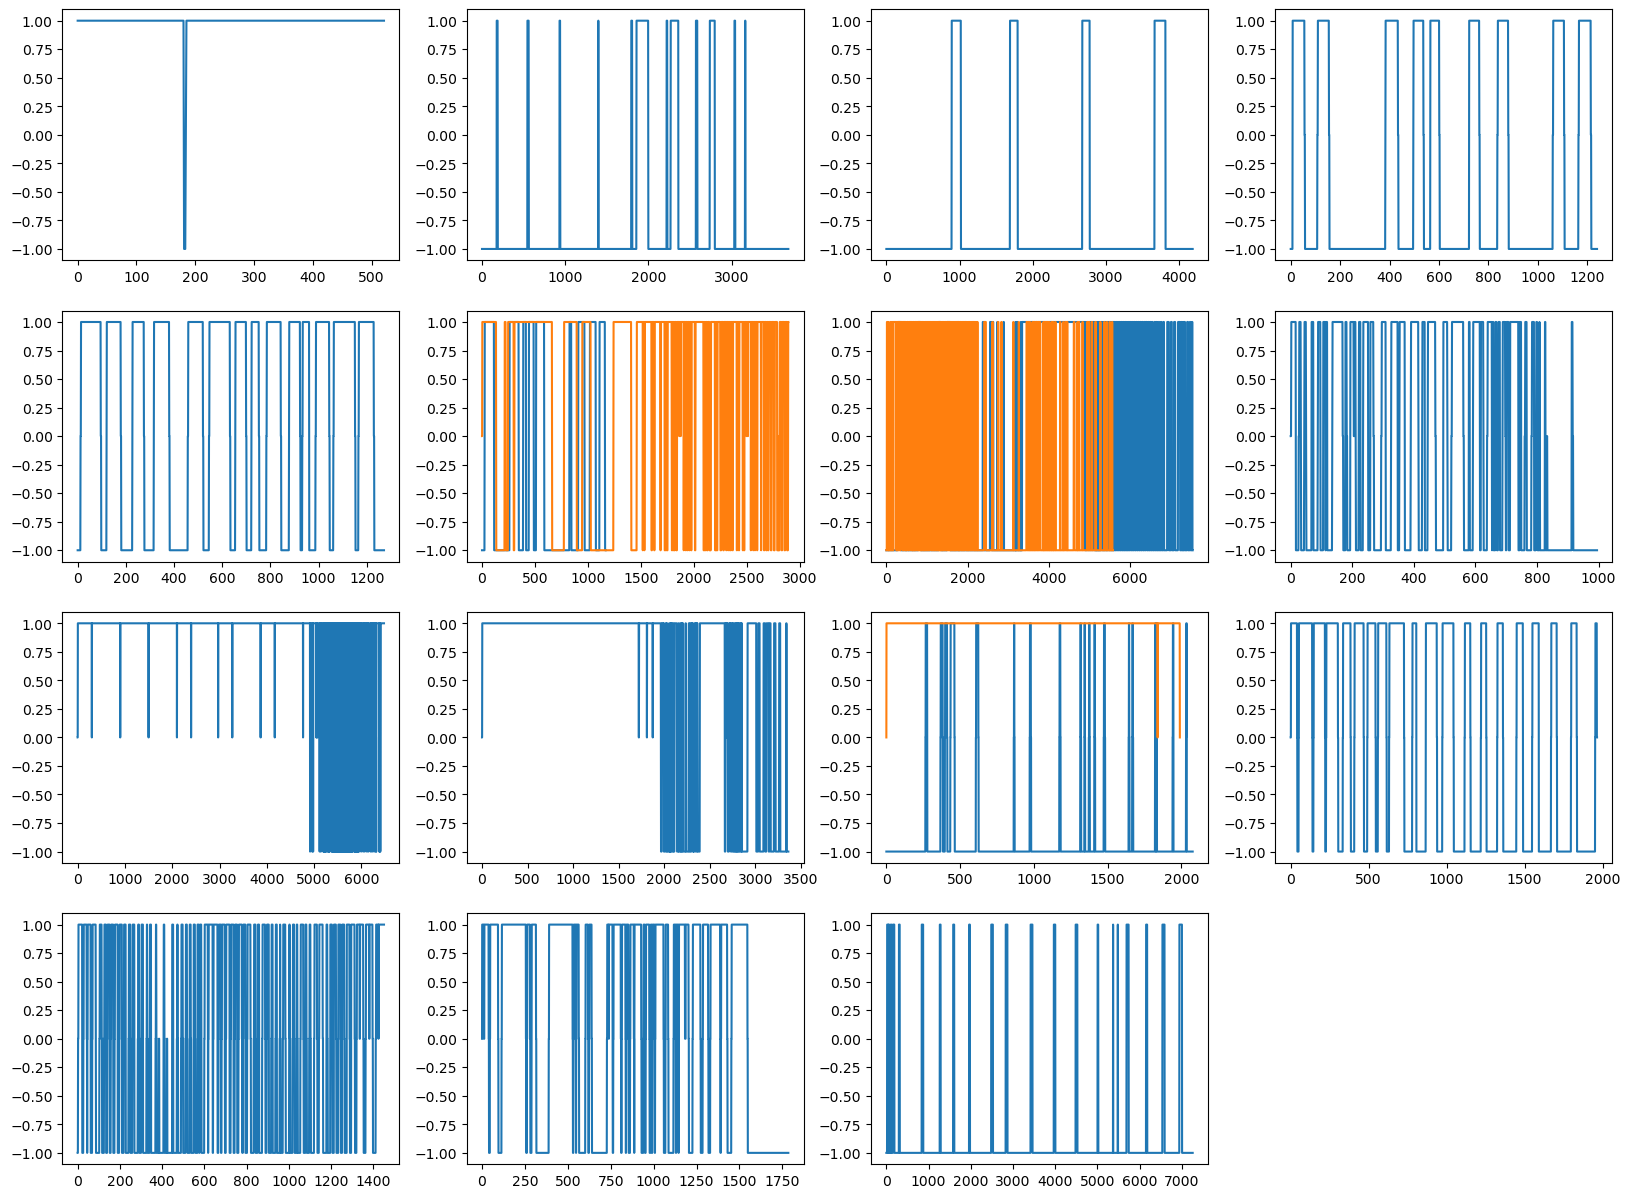

In [12]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j]['annotation']
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)

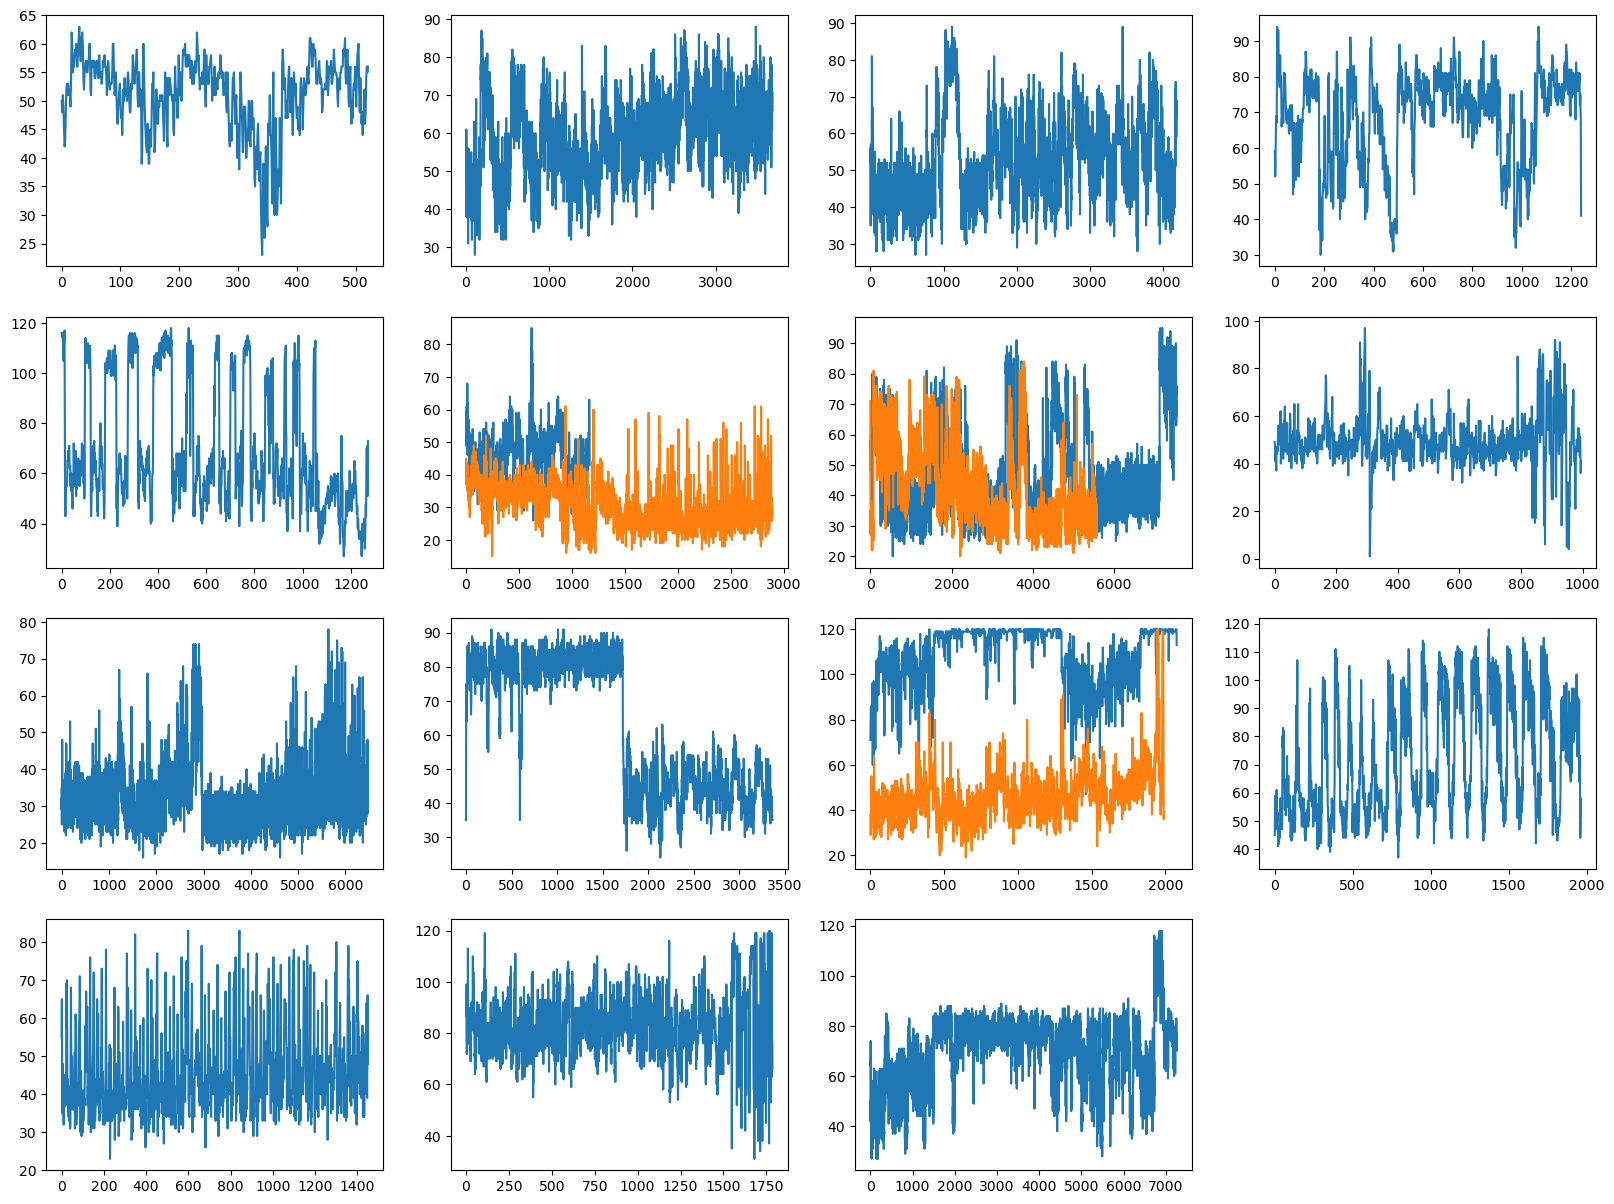

In [13]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j][features[1]]
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)

In [14]:
from sklearn.decomposition import PCA

X = data.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)

In [15]:
X_pca.std()

2.8779082374897613

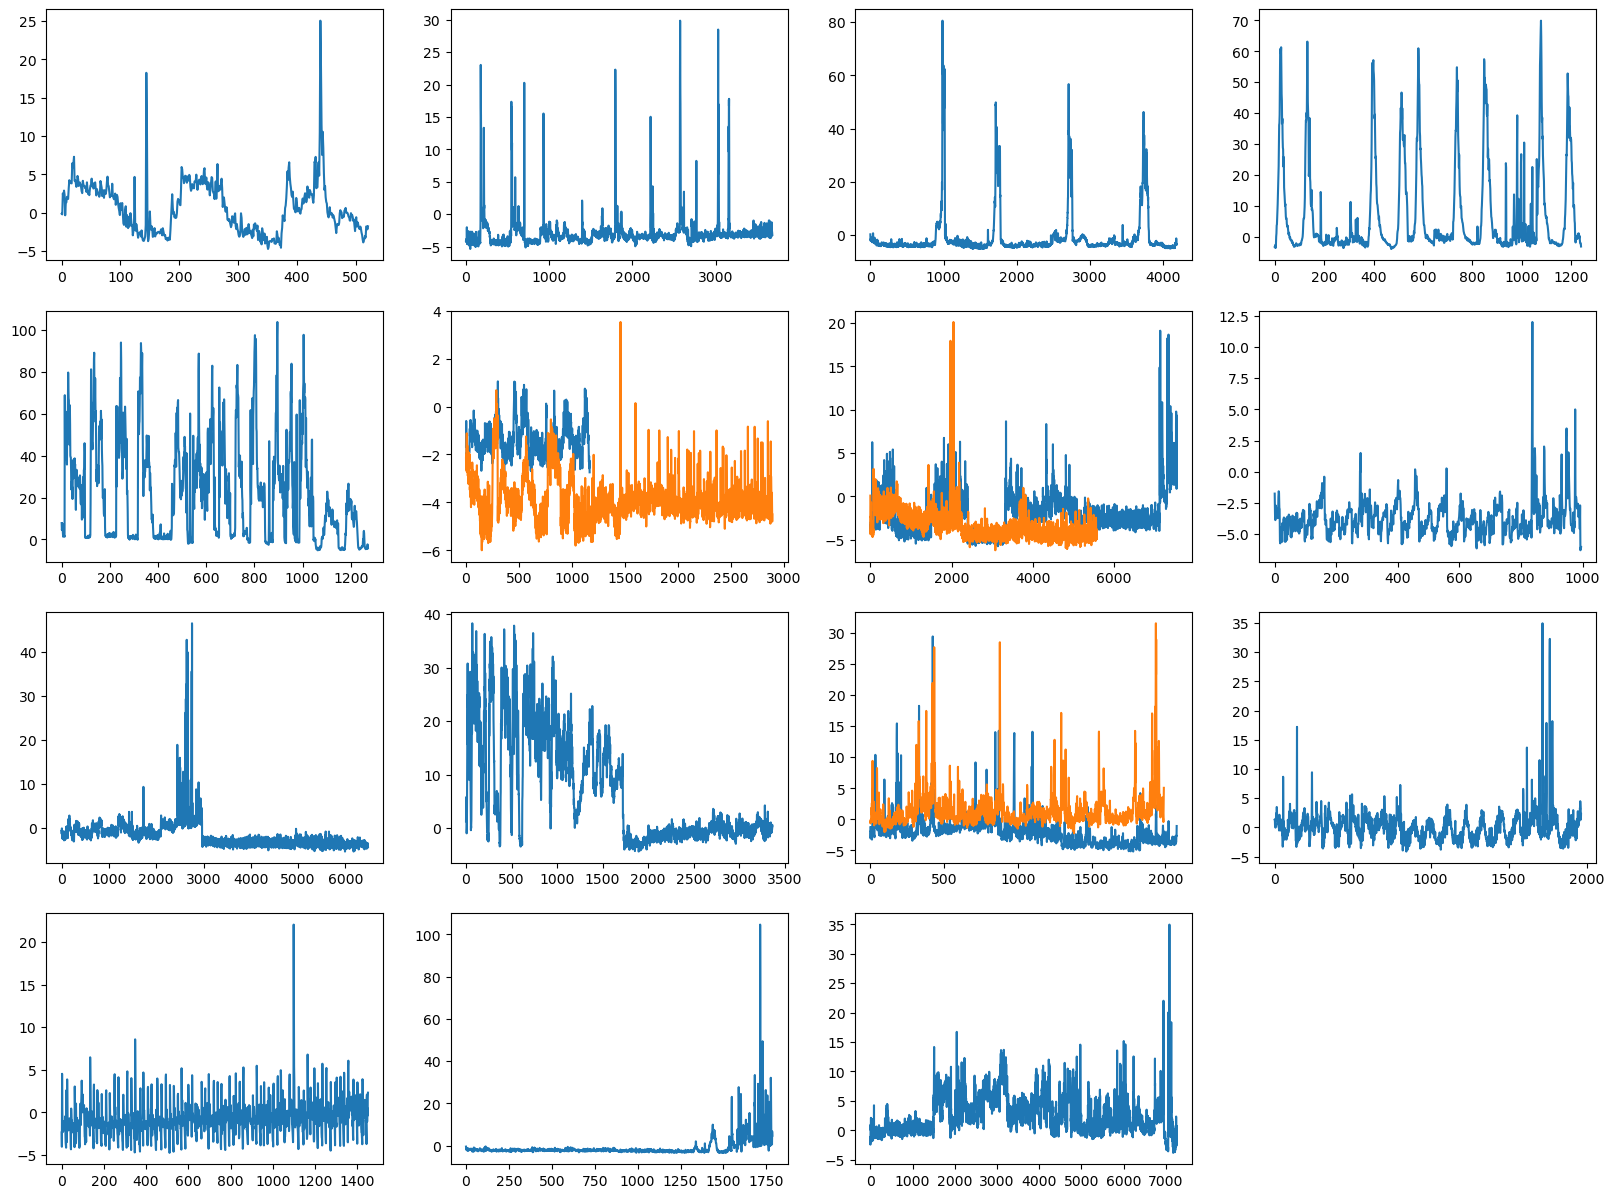

In [16]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_pca = X_pca[data_list[i][j].index, 0]
        x_temp = np.arange(len(data_pca))
        plt.plot(x_temp, data_pca)

In [17]:
X_pca.shape

(55456, 32)

In [18]:
ts = []
for i in range(15):
    ts.append(X_pca[data_list[i][0].index, :])
    
ts.append(X_pca[data_list[5][1].index, :])
ts.append(X_pca[data_list[6][1].index, :])
ts.append(X_pca[data_list[10][1].index, :])

In [19]:
ts[0].shape

(522, 32)

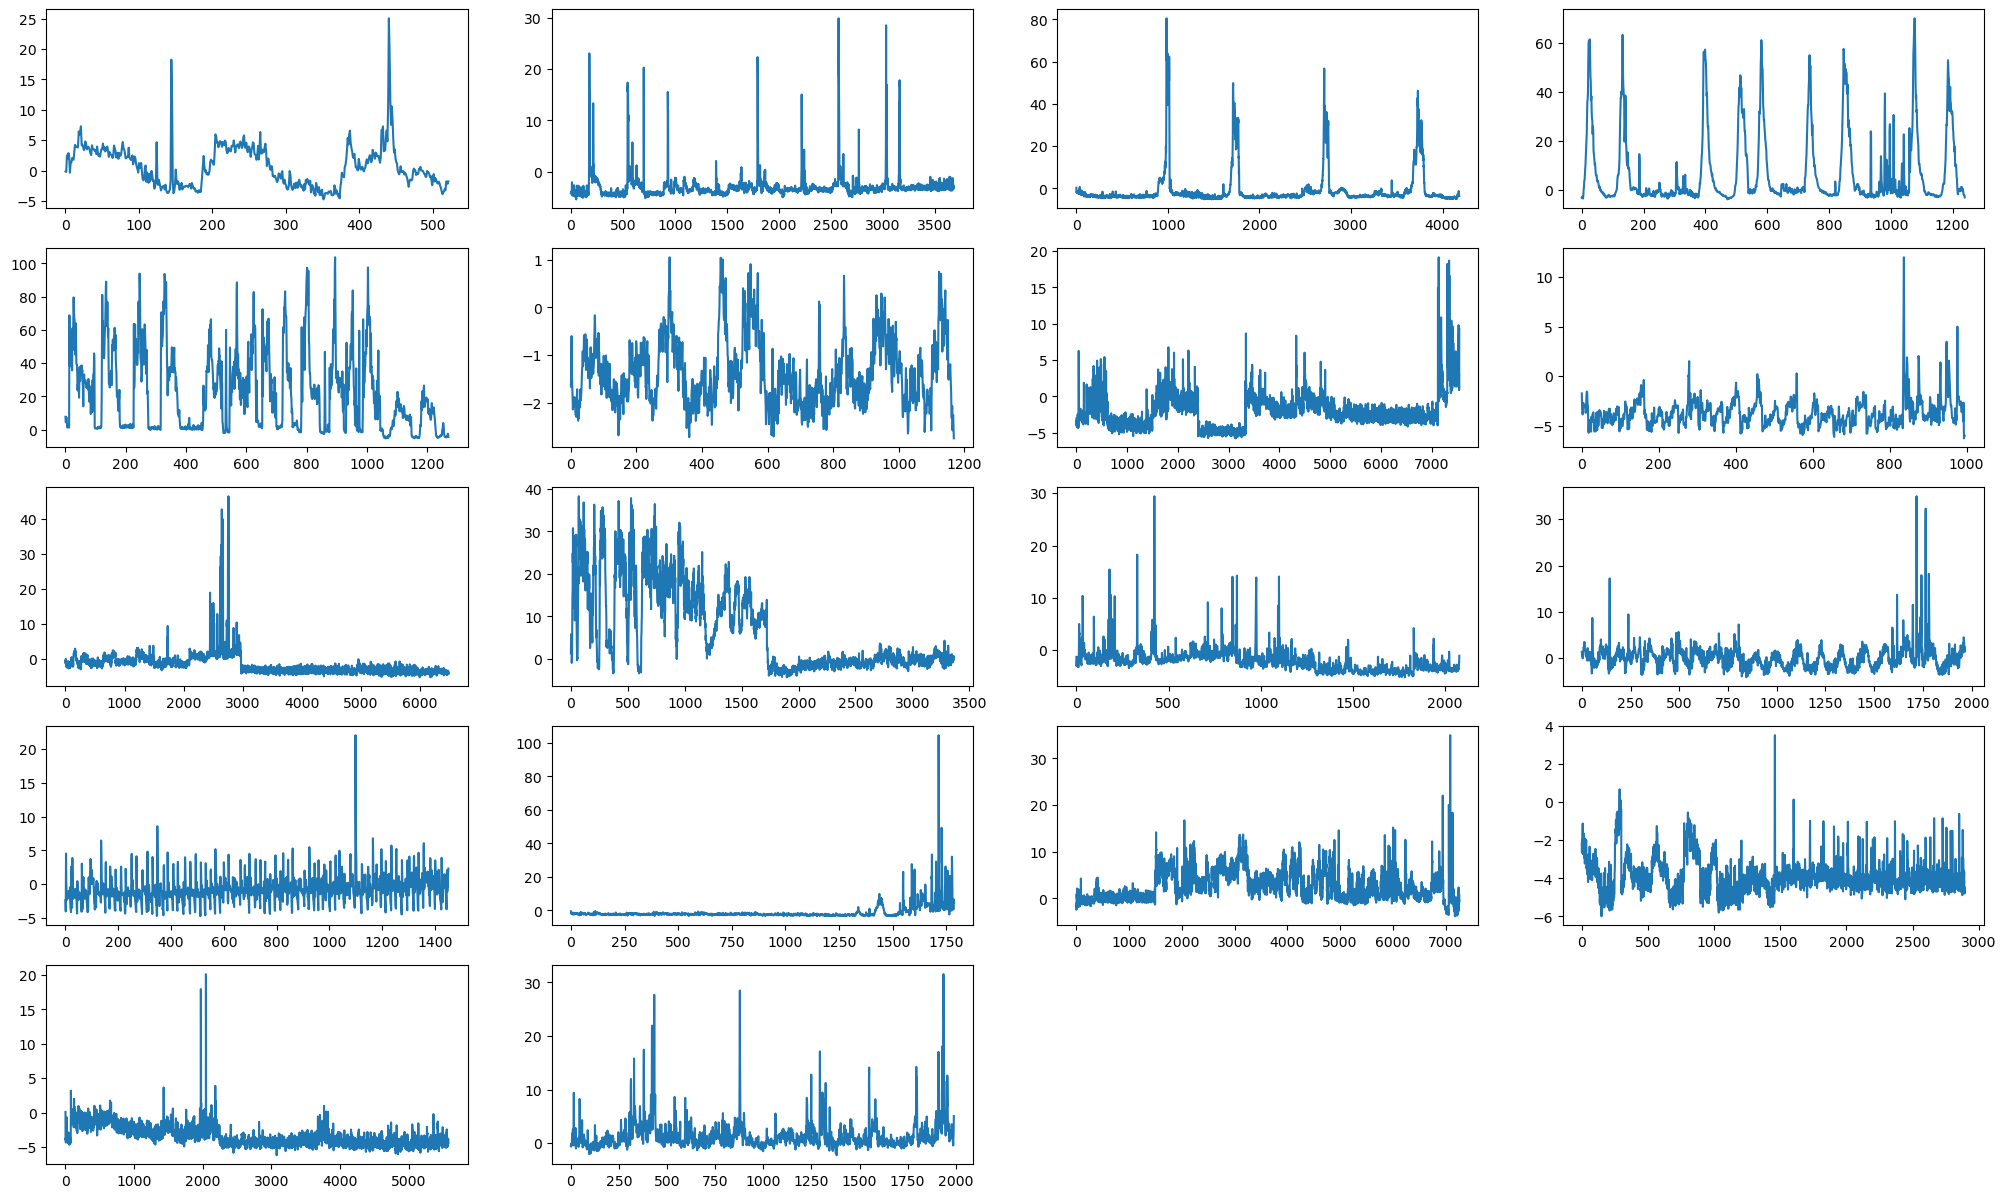

In [20]:
plt.figure(figsize=(25, 15))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])

In [21]:
ts = to_time_series_dataset(ts)

In [22]:
ts.shape

(18, 7541, 32)

<Axes: >

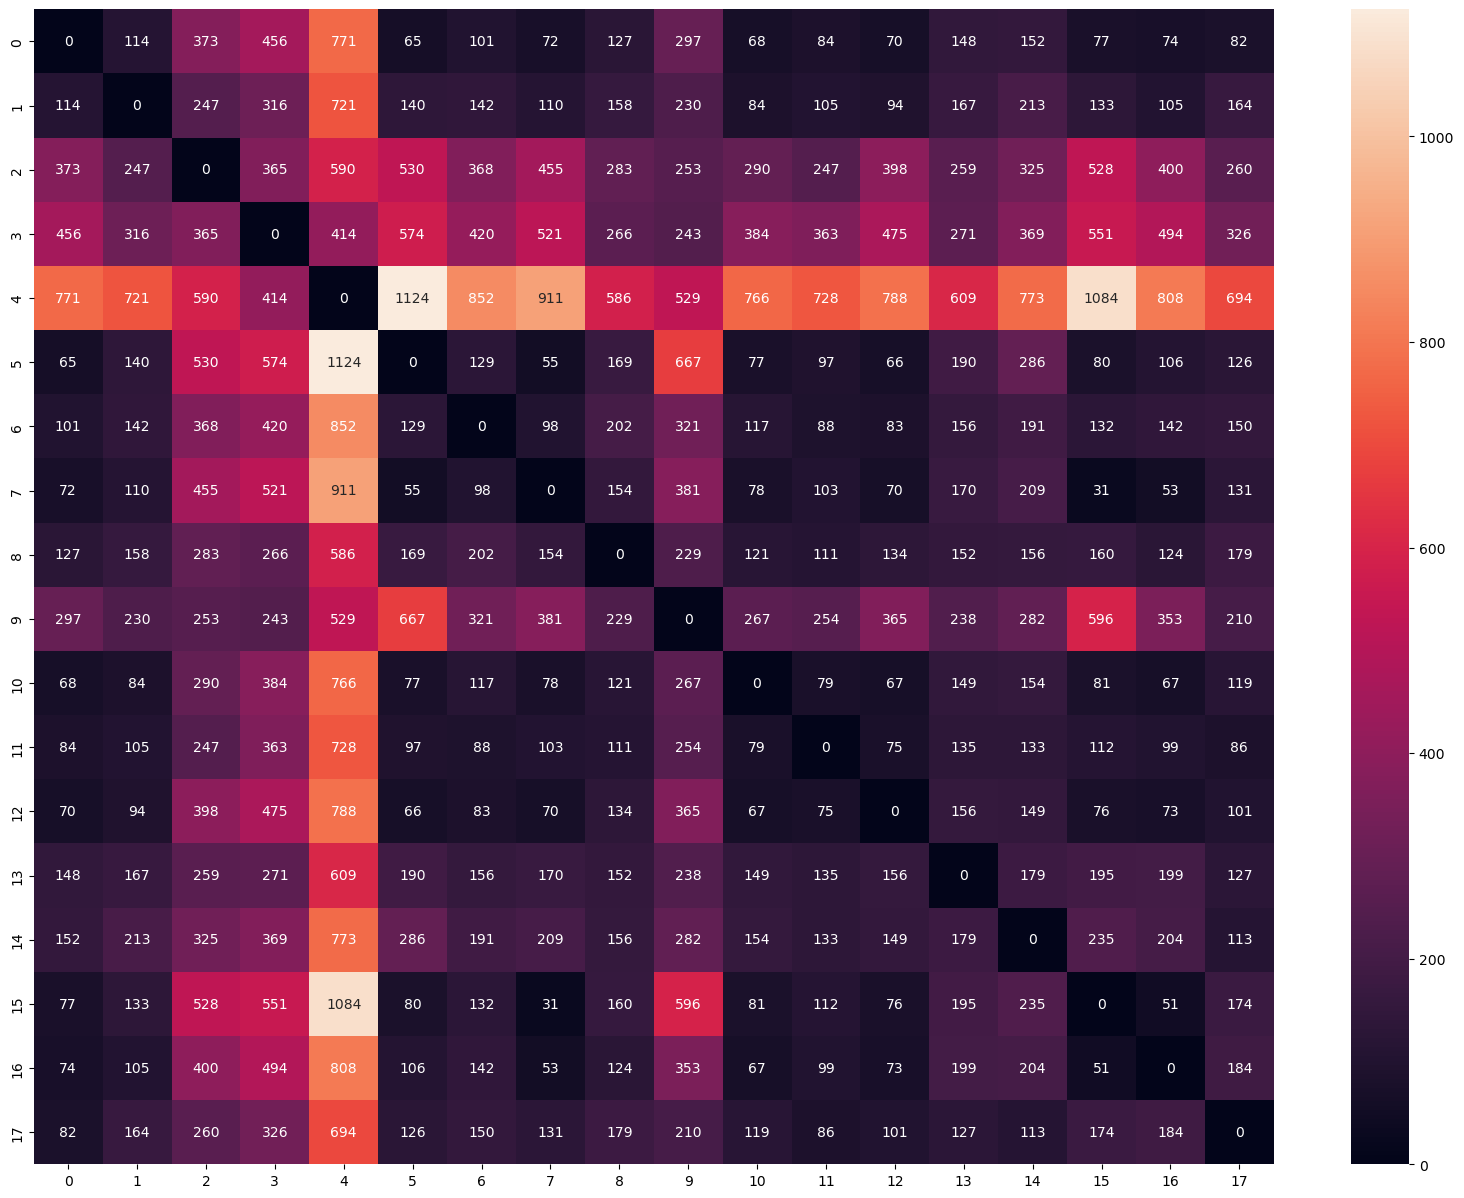

In [23]:
distance = np.zeros([18, 18])
for i in range(18):
    for j in range(i, 18):
        distance[i, j] = distance[j, i] = dtw(ts[i][:, 0], ts[j][:, 0])
plt.figure(figsize=(20, 15))
sns.heatmap(distance, annot=True, fmt='.0f')

In [24]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    8.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   19.2s finished


1174152.972 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   15.2s finished


342278.054 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   16.5s finished


342278.054 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.1s


[0 0 0 3 2 0 0 0 0 0 0 0 0 0 1 0 0 0]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   18.2s finished


In [25]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.21431088320737093

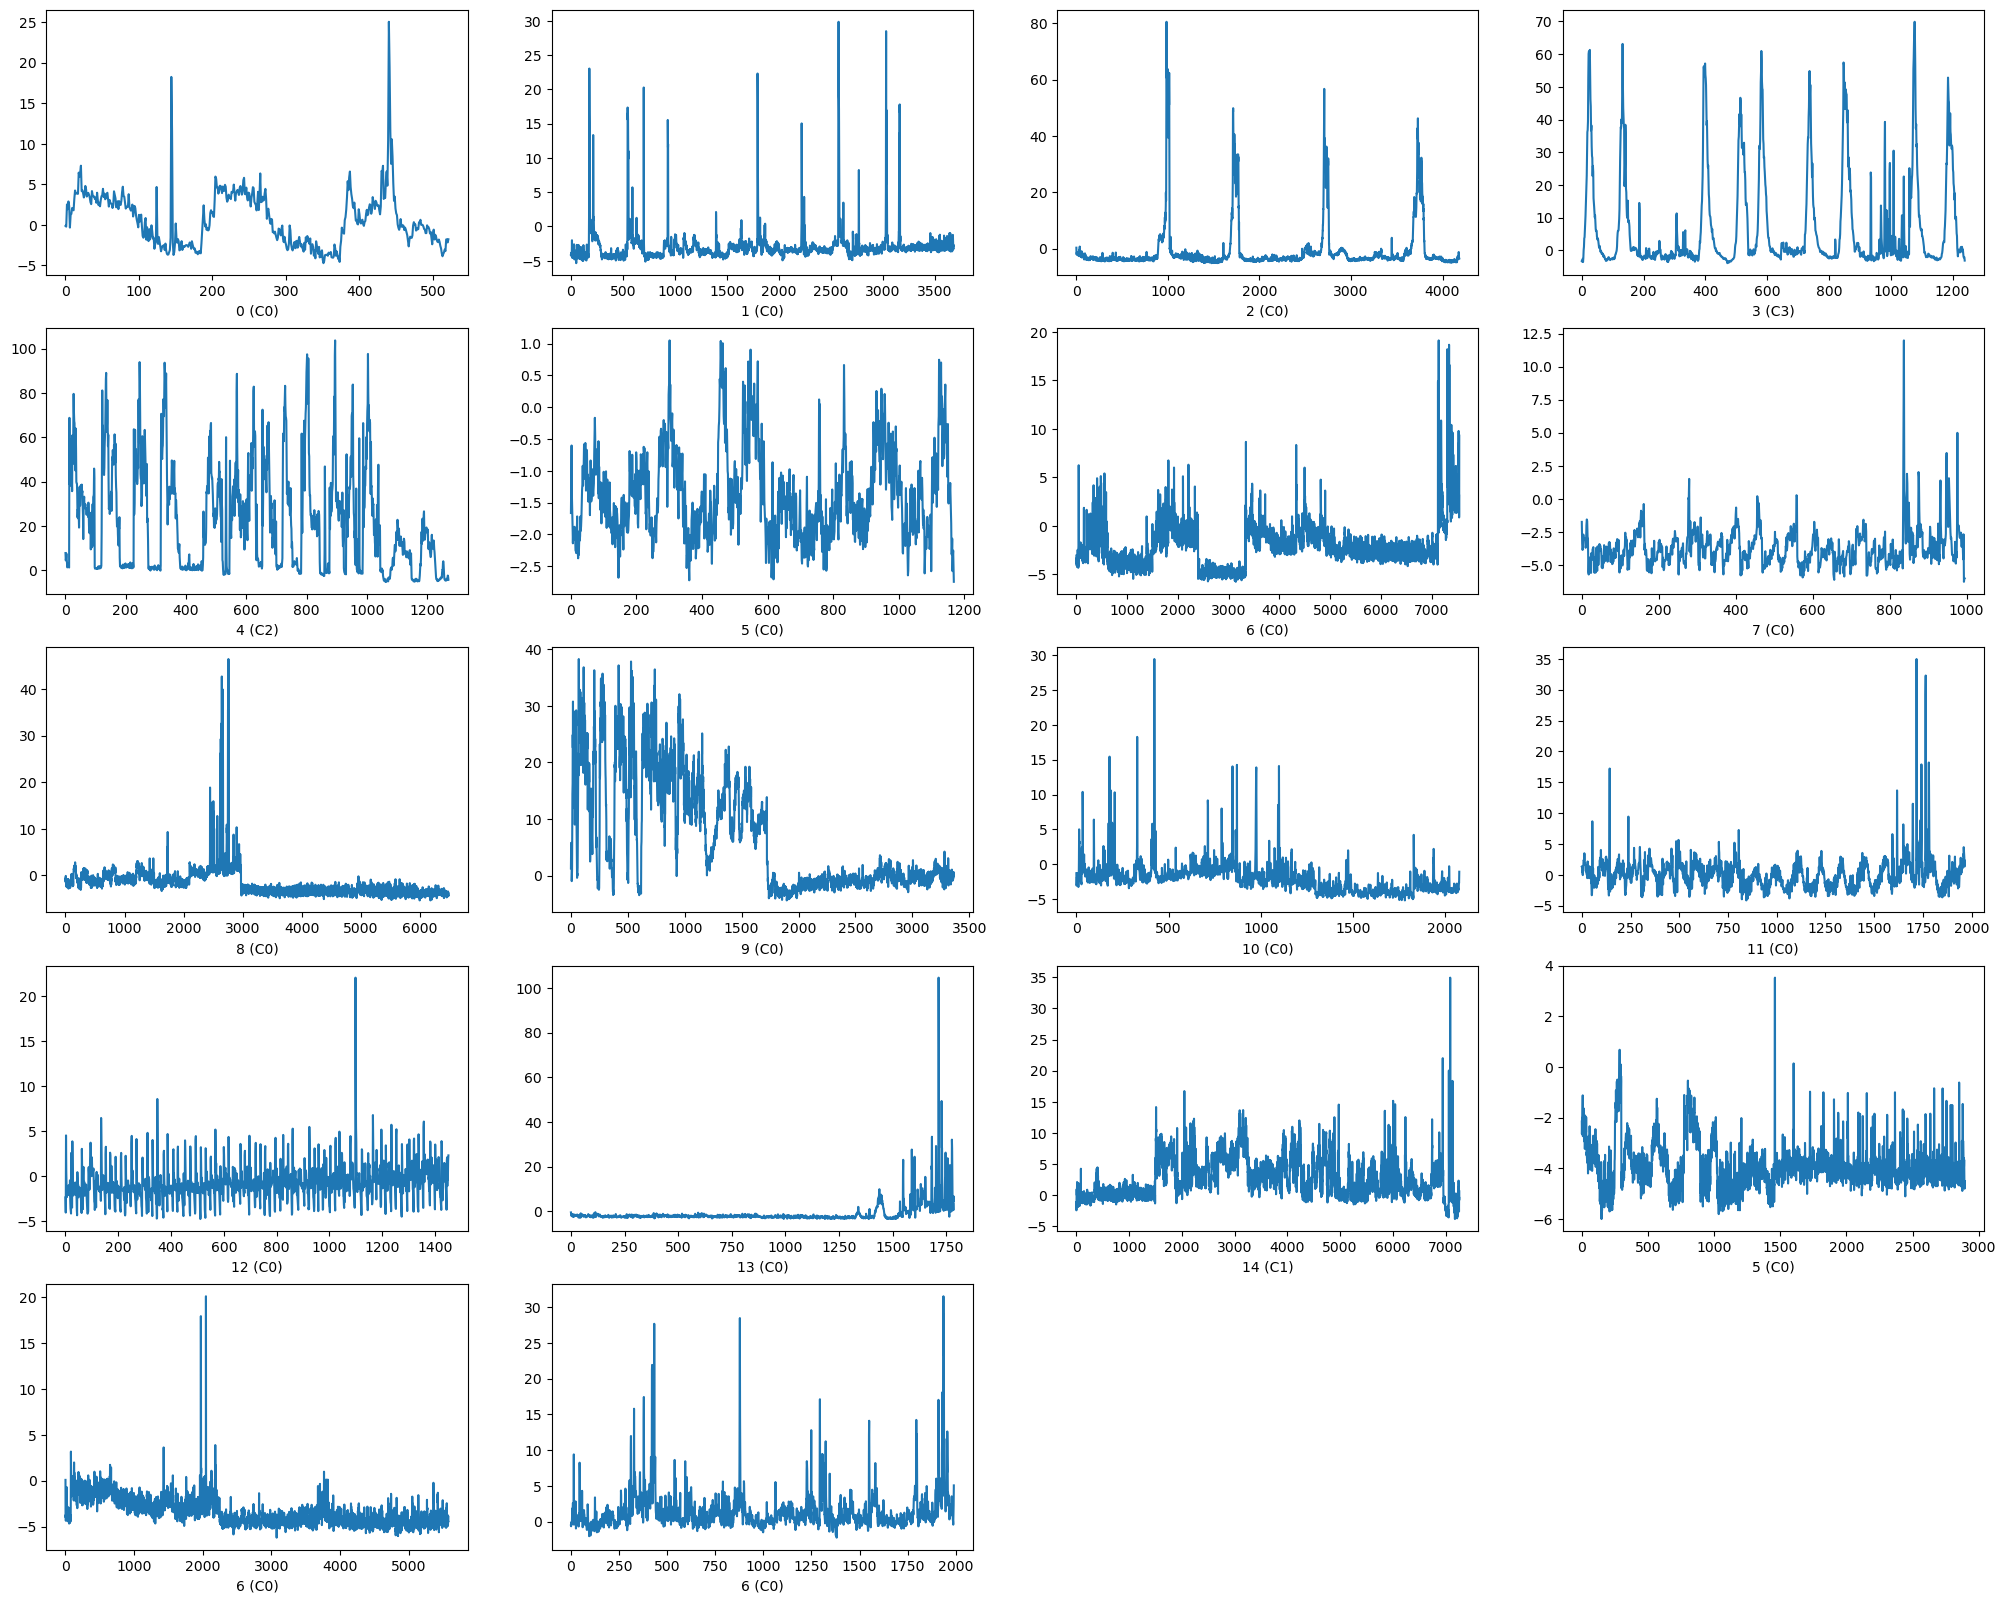

In [26]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [28]:
from sklearn.decomposition import PCA

X = data.iloc[:, 2:].values
y = np.int32(data['annotation'].values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The original number of training feature is:  360


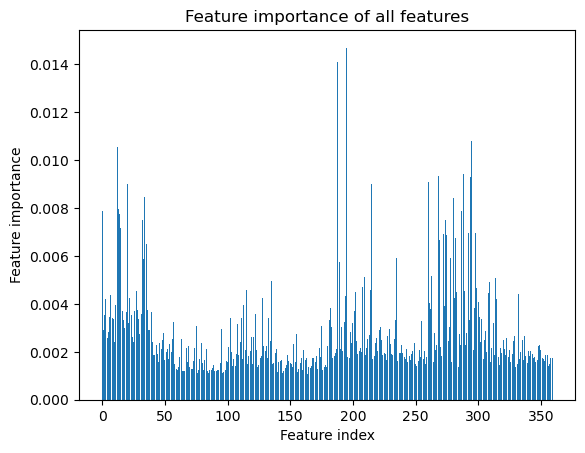

The current number of training feature after feature selection is:  120


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
random_state = 42

print("The original number of training feature is: ", X_scaled.shape[-1])
clf_etc = ExtraTreesClassifier(random_state=random_state).fit(X_scaled, y) # fit the model
feature_importances = clf_etc.feature_importances_  # get the feature importance

plt.bar(range(len(feature_importances)), feature_importances)   # plot the feature importance
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.title("Feature importance of all features")
plt.show()

important_feature_indices=np.argsort(feature_importances)   # sort the feature importance  
important_feature_indices_cut=important_feature_indices[:int(len(important_feature_indices)/1.5)]   # select the most important features  

X_selected=np.delete(X_scaled,important_feature_indices_cut,1)    # delete the least important features
print("The current number of training feature after feature selection is: ", X_selected.shape[1])

In [30]:
ts = []
for i in range(15):
    ts.append(X_selected[data_list[i][0].index, :])
    
ts.append(X_selected[data_list[5][1].index, :])
ts.append(X_selected[data_list[6][1].index, :])
ts.append(X_selected[data_list[10][1].index, :])

ts = to_time_series_dataset(ts)

In [31]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   31.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   22.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   10.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


661458.392 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.2s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


274979.190 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


274979.190 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   28.8s


[0 0 0 0 3 0 0 0 0 2 0 0 0 1 1 0 0 0]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   58.9s finished


In [33]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.16003018359306054

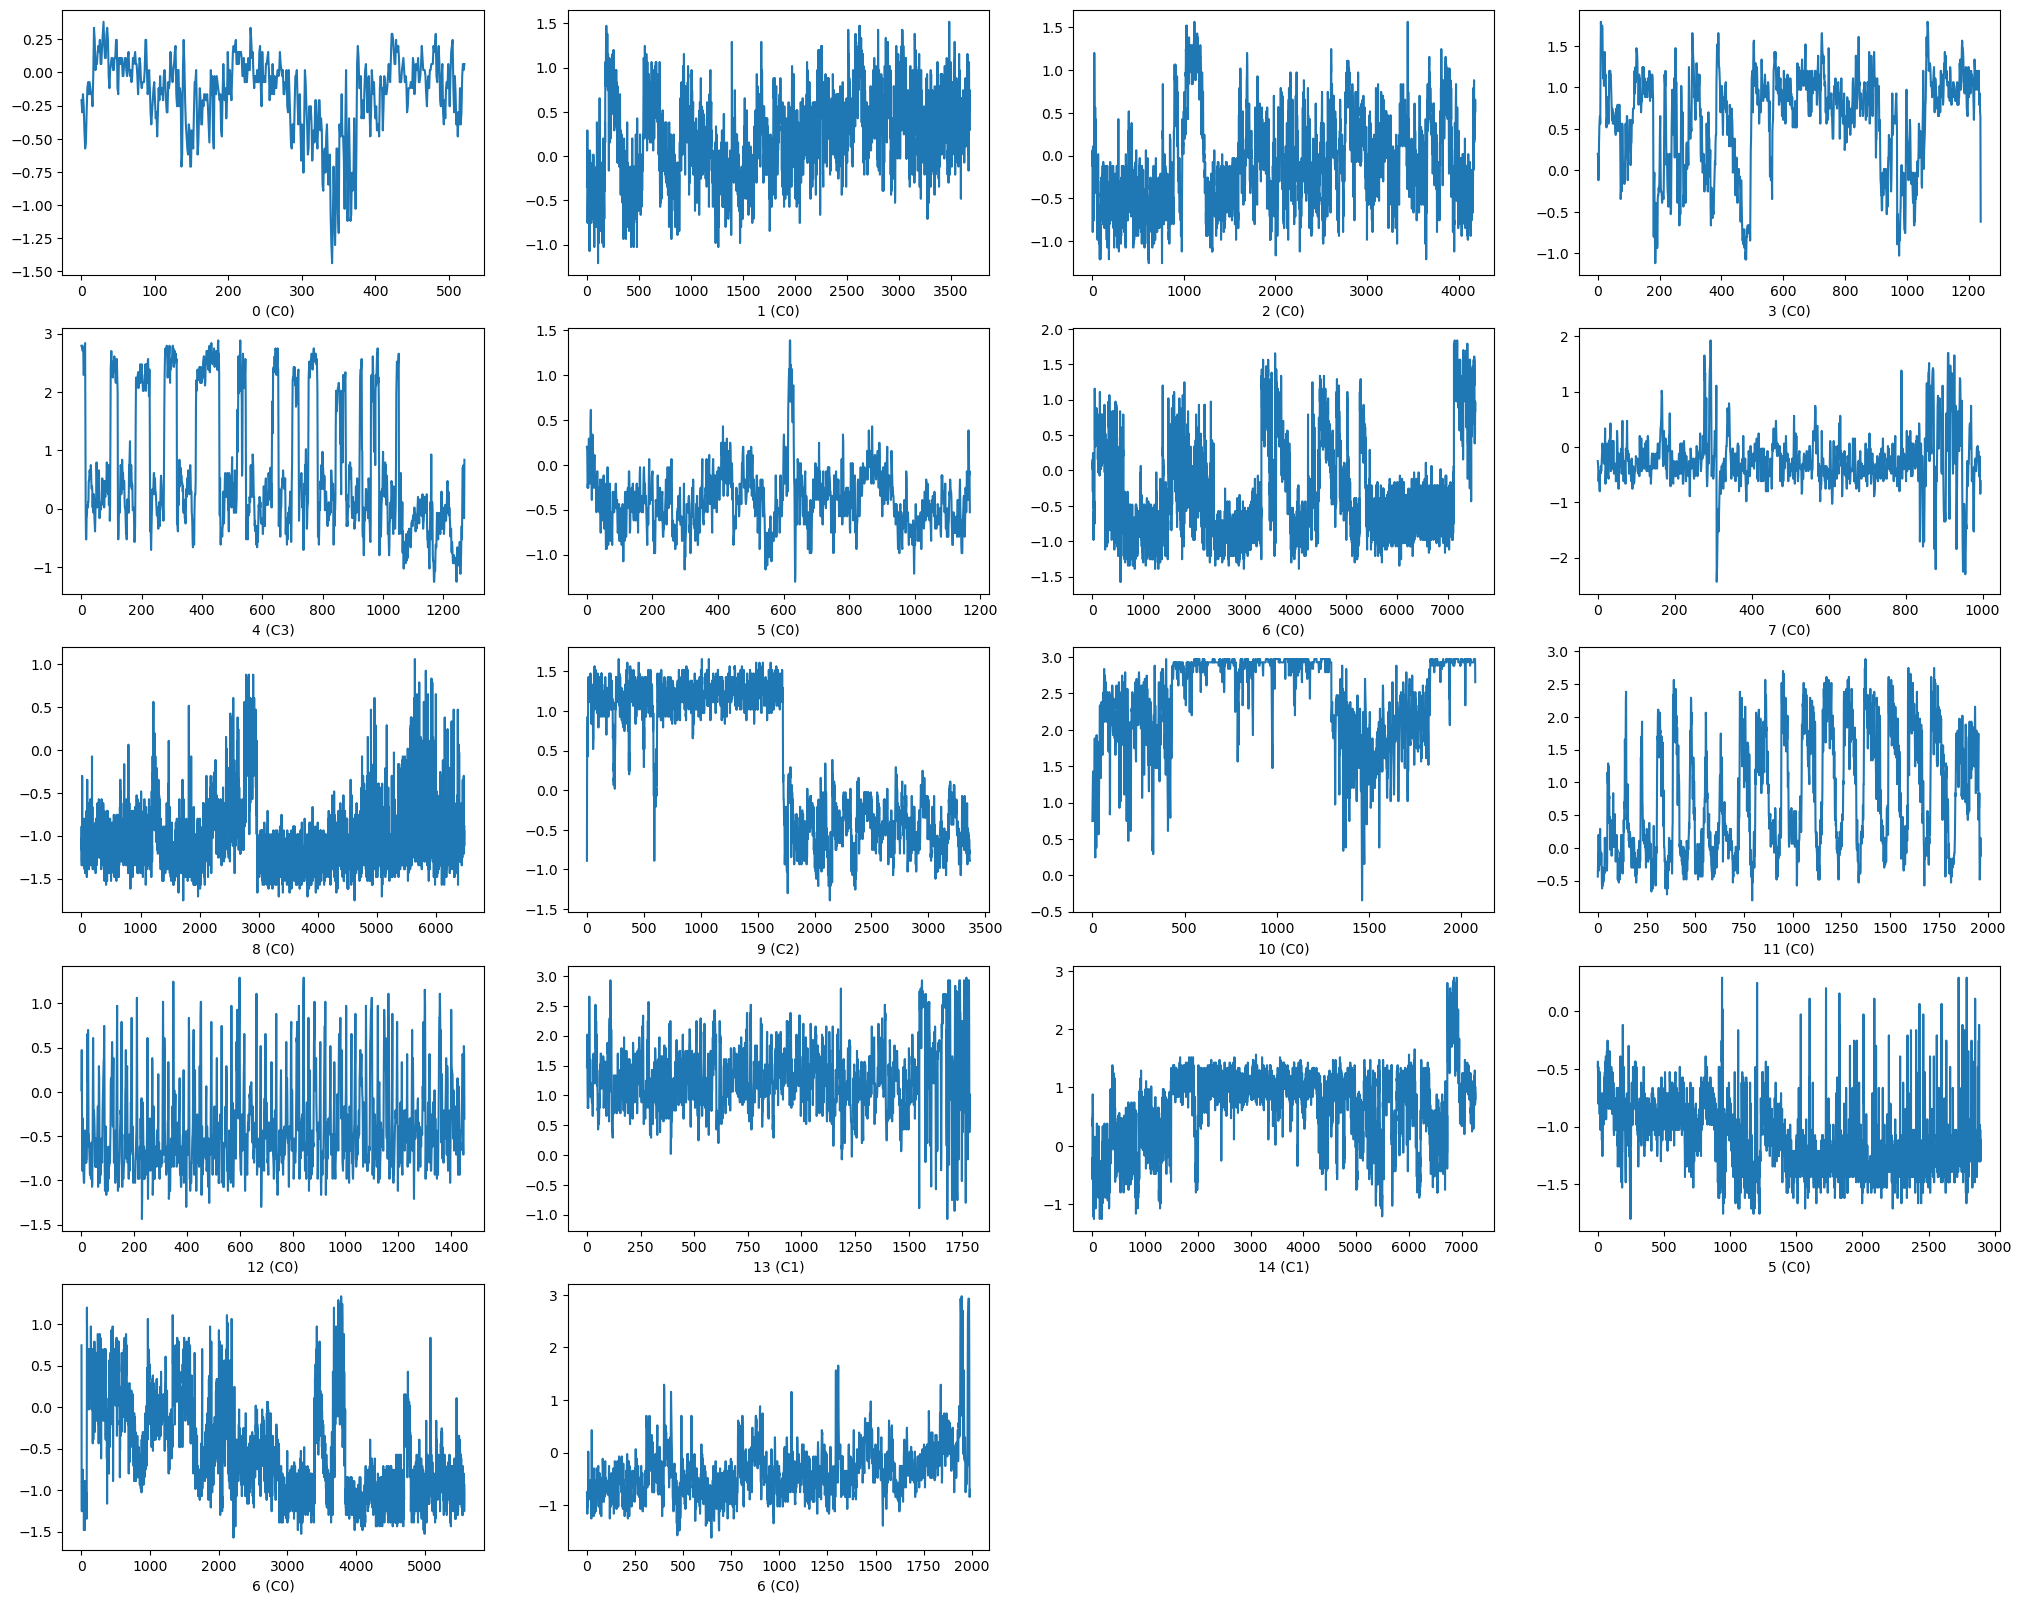

In [32]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [34]:
n_clusters = 5
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   29.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   21.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   10.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   25.6s finished
[Paral

598134.968 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.3min finished


248952.768 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.3min finished


248952.768 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   21.5s


[0 0 0 0 3 0 0 0 4 2 0 0 0 1 1 0 4 0]


[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.2min finished


In [35]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.13663752980854463